<a href="https://colab.research.google.com/github/av-dutta/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading the data
file_path = '/content/drive/MyDrive/Capstone Project Unsupervised/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv'

dataset = pd.read_csv(file_path)

# Make a copy of the dataset
netflix_df = dataset.copy()

# Display first 5 rows
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
# Shape of the dataset

numberofrows_1, numberofcolumns_1 = netflix_df.shape
print('There are {} rows and {} columns'.format(numberofrows_1, numberofcolumns_1)+' in our Netflix Dataset.')

There are 7787 rows and 12 columns in our Netflix Dataset.


In [ ]:
# Information about the dataset

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


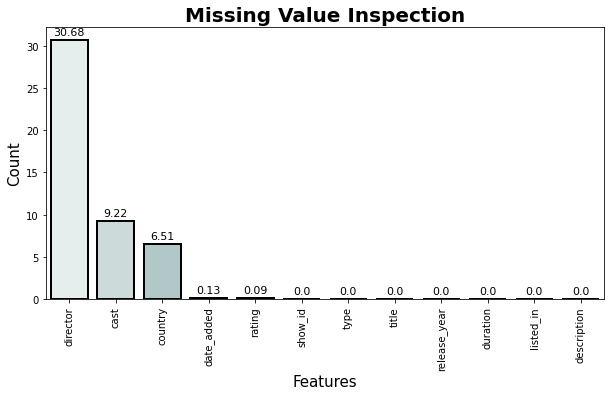

In [ ]:
# Missing value Inspection

Value_Missing = netflix_df.isnull().sum().sort_values(ascending = False)
percent_missing = (netflix_df.isnull().sum() * 100 / len(netflix_df)).round(2).sort_values(ascending = False)
missing_data = pd.concat([Value_Missing, percent_missing], axis = 1, keys = ['Total', 'Percent'])
f, ax = plt.subplots(figsize = (10, 5))
plt.xticks(rotation = '90')
cplot = sns.barplot(x = missing_data.index, y = missing_data['Percent'], palette = 'bone_r', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Missing Value Inspection', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

- 'director'(30.68%), 'cast'(9.22%), 'country'(6.51%), 'date_added'(0.13%), 'rating'(0.09%) are features with missing values. 

In [ ]:
netflix_df['rating'].replace(np.nan, 'TV-MA', inplace  = True)
netflix_df['country'].replace(np.nan, 'United States', inplace  = True)
netflix_df['cast'].replace(np.nan, 'missing info', inplace  = True)

In [ ]:
netflix_df['date_added'].dropna(axis = 0, inplace = True)

In [ ]:
print('There are {} rows and {} columns'.format(netflix_df.shape[0], netflix_df.shape[1])+' in our modified Netflix Dataset.')

There are 7787 rows and 12 columns in our modified Netflix Dataset.


In [ ]:
# Generate count statistics of duplicate entries

if (len(netflix_df[netflix_df.duplicated()]) > 0):
    print('No. of duplicated entries: ', len(netflix_df[netflix_df.duplicated()]))
    print(netflix_df[netflix_df.duplicated(keep = False)].sort_values(by = list(netflix_df.columns)).head())
else:
    print('No duplicated entries found.')

No duplicated entries found.


In [ ]:
# Unique values of all features

netflix_df.nunique().to_frame(name = 'Unique Values')

,Unique Values
show_id,7787
type,2
title,7787
director,4049
cast,6832
country,681
date_added,1565
release_year,73
rating,14
duration,216


In [ ]:
# type analysis

type_name = netflix_df['type'].value_counts()
colors = ['#BBFFFF', '#FFD700']

trace = go.Pie(labels = type_name.index, 
               values = type_name, 
               textinfo = 'value',
               marker = dict(colors = colors, 
               line=dict(color = '#000000', 
               width = 2)))

layout = go.Layout(title = 'Proportion of Show types', width = 500, height = 500)
fig = go.Figure(data = [trace], layout = layout)
py.iplot(fig, filename='pie_chart_subplots')

- Approximately 70% of the Netflix shows are Movie and 30% are TV Show.

In [ ]:
# Rating insights

netflix_df['rating'].value_counts().to_frame()

,rating
TV-MA,2870
TV-14,1931
TV-PG,806
R,665
PG-13,386
TV-Y,280
TV-Y7,271
PG,247
TV-G,194
NR,84


In [ ]:
# Show type vs Rating

type_TvShow = netflix_df[netflix_df['type'] == 'TV Show']['rating']
trace0 = go.Box(y = type_TvShow, name = 'Rating of TV Shows',
              marker = dict(color = 'rgb(214, 12, 140)',))

type_Movie = netflix_df[netflix_df['type'] == 'Movie']['rating']
trace1 = go.Box(y = type_Movie, name = 'Rating of Movies',
              marker = dict(color = 'rgb(0, 128, 128)',))

layout = go.Layout(title = 'Box Plots of Netflix Shows',width = 800, height = 500)

data = [trace0, trace1]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

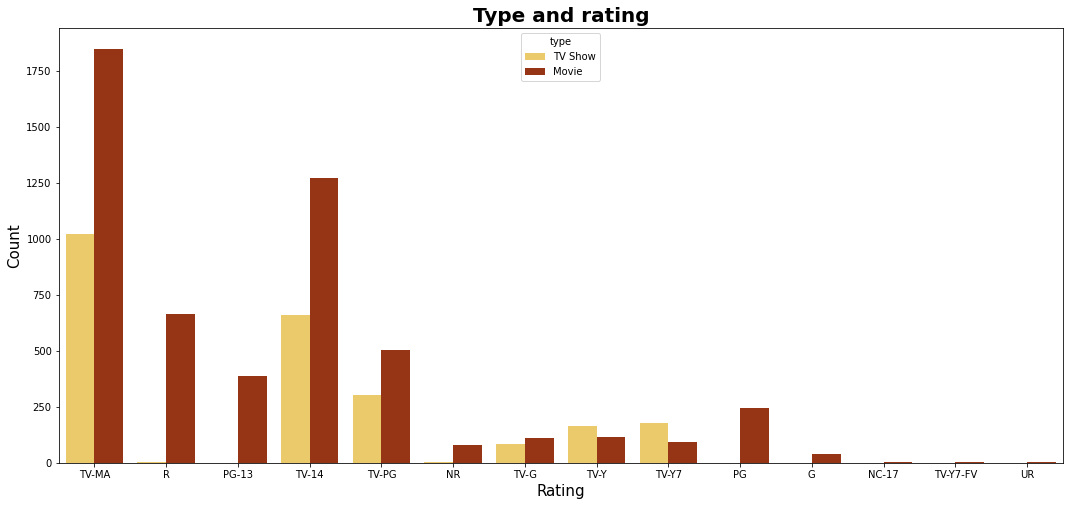

In [ ]:
plt.figure(figsize = (18,8))
sns.countplot(x = 'rating', hue = 'type', data = netflix_df, palette = 'afmhot_r')
plt.xlabel('Rating', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Type and rating', size = '20', fontweight = 'bold')
plt.show();

In [ ]:
# Creating new column for age rating
rating_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Young Adults',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

netflix_df['age_rating'] = netflix_df['rating'].replace(rating_ages)
netflix_df['age_rating'].unique()

array(['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids'],
      dtype=object)

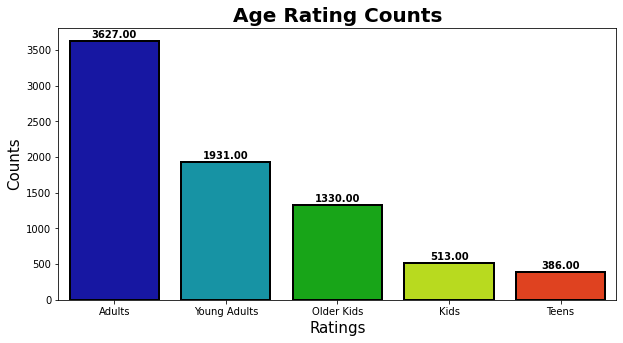

In [ ]:
# Countplot for Adult, Teen, Kids, Older Kids
f, ax = plt.subplots(figsize = (10, 5))
ax = sns.countplot('age_rating', data = netflix_df, lw = 2, ec = 'black', palette = 'nipy_spectral',
                  order = netflix_df['age_rating'].value_counts().index)
plt.title('Age Rating Counts', fontsize = 20, fontweight = 'bold',)
plt.xlabel('Ratings', fontsize = 15)
plt.ylabel('Counts', fontsize = 15)

# Adding Annotation
for p in ax.patches:
  ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
  p.get_height()), ha = 'center', va = 'center', xytext = (0, 6), 
  textcoords = 'offset points', fontsize = 10, fontweight = 'bold')

In [ ]:
# Release year insights

netflix_df['release_year'].value_counts().to_frame().head(10)

,release_year
2018,1121
2017,1012
2019,996
2016,882
2020,868
2015,541
2014,334
2013,267
2012,219
2010,173


In [ ]:
# Year wise Netflix Shows

fig = go.Figure()
year = netflix_df['release_year'].value_counts().to_frame().head(10).index
yearly_movies = netflix_df[netflix_df.type == 'TV Show']['release_year'].value_counts().sort_index(ascending = False).head(10)
trace0 = go.Scatter(x = year, y = yearly_movies, name = 'Yearly Movies',
              marker = dict(color = 'rgb(255,140,0)',))

yearly_shows = netflix_df[netflix_df.type == 'Movie']['release_year'].value_counts().sort_index(ascending = False).head(10)
trace1 = go.Scatter(x = year, y = yearly_shows, name = 'Yearly Shows',
              marker = dict(color = 'rgb(3,168,158)',))

total_content = netflix_df['release_year'].value_counts().sort_index(ascending = False).head(10)
trace2 = go.Scatter(x = year, y = total_content, name = 'Total Content',
              marker = dict(color = 'rgb(255,106,106)',))


layout = go.Layout(title = 'Line plot of Netflix Shows',width = 1000, height = 500)

data = [trace0, trace1, trace2]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

In [ ]:
netflix_df['cast_name'] = netflix_df['cast'].apply(lambda x :  x.split(',')) 
cast_count = []
for i in netflix_df['cast_name']: cast_count += i
    
cast_dict = dict((i, cast_count.count(i)) for i in cast_count)

netflix_df_cast_count = pd.DataFrame(cast_dict.values(),cast_dict.keys()).reset_index().sort_values(0,ascending = False).rename(
    columns = {'index' : 'Cast Name', 0 : 'Count'}).iloc[1:]
netflix_df_cast_count.head()

,Cast Name,Count
1296,Anupam Kher,38
194,Takahiro Sakurai,28
4051,Shah Rukh Khan,27
2214,Om Puri,27
742,Boman Irani,25


In [ ]:
netflix_df['director'].value_counts().to_frame(name = 'Count').head()

,Count
"Raúl Campos, Jan Suter",18
Marcus Raboy,16
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12


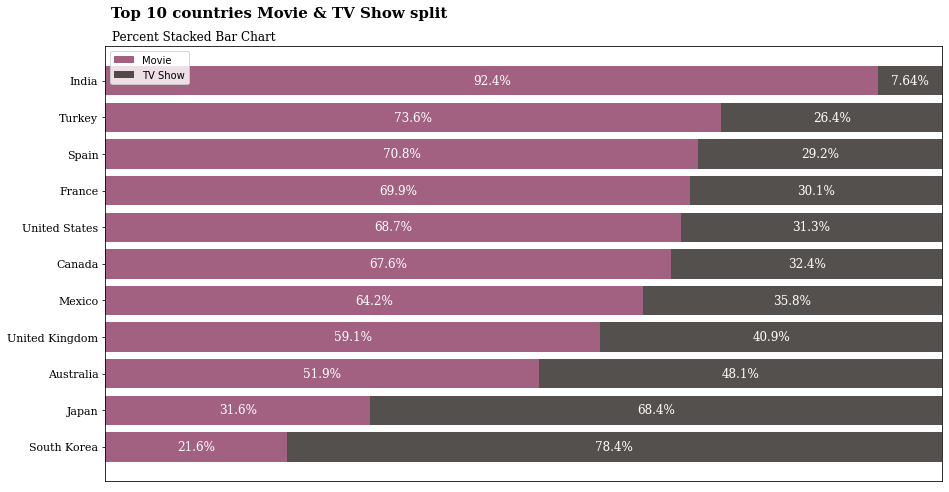

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split

# Lets retrieve just the first country
netflix_df['principal_country'] = netflix_df['country'].apply(lambda x: x.split(",")[0])
netflix_df['principal_country'].head()

country_order = netflix_df['principal_country'].value_counts()[:11].index
content_data = netflix_df[['type', 'principal_country']].groupby('principal_country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='#8B3A62', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='#292421', alpha=0.8, label='TV Show')


ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticklabels(content_data_ratio.index, fontfamily='serif', fontsize=11)

# Addind Annotaion
for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['Movie'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')

for i in content_data_ratio.index:
    ax.annotate(f"{content_data_ratio['TV Show'][i]*100:.3}%", 
                   xy=(content_data_ratio['Movie'][i]+content_data_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=12, fontweight='light', 
                   fontfamily='serif', color='white')
    

fig.text(0.13, 0.93, 'Top 10 countries Movie & TV Show split', fontsize = 15, 
        fontweight='bold', fontfamily='serif')   
fig.text(0.131, 0.89, 'Percent Stacked Bar Chart', fontsize=12,fontfamily='serif')   
plt.legend()
plt.show()

In [ ]:
country = netflix_df['country'].value_counts().reset_index()
country = country[country['country'] /  country['country'].sum() > 0.01]

fig = px.pie(country, values='country', names = 'index', color_discrete_sequence = px.colors.sequential.Reds)
fig.update_traces(textposition = 'inside', textinfo = 'percent+label',
                  marker = dict(line = dict(color = 'black', width = 2)))
fig.show()

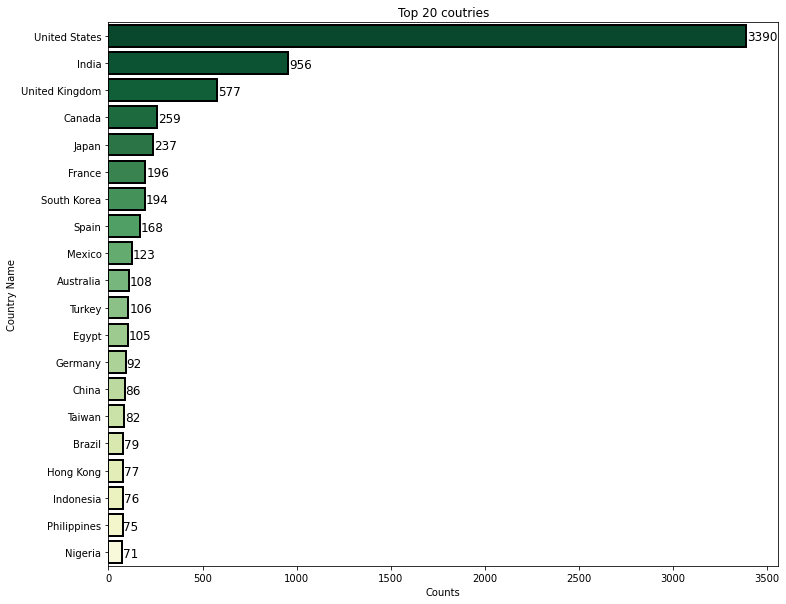

In [ ]:
# Top 20 countries on Netflix
plt.figure(figsize = (12,10))
ax = sns.countplot(y ='principal_country',lw=2, ec='black', data = netflix_df, palette = 'YlGn_r',
              order = netflix_df['principal_country'].value_counts().index[0:20])
# Adding Annotation
for p in ax.patches:
    width = p.get_width()
    plt.text(5+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='left', va='center',fontsize=12)
plt.title('Top 20 coutries')
plt.xlabel('Counts')
plt.ylabel('Country Name');

In [ ]:
fig = px.bar(netflix_df, 
             x = netflix_df['listed_in'].value_counts().head(15).index, 
             y = netflix_df['listed_in'].value_counts().head(15).values,
             color = netflix_df['listed_in'].value_counts().head(15).values,
             labels = {'x':'Genre ', 'y': 'Count '}, 
             title = 'Top 15 Genre in Shows',
             height = 500)
fig.show()

In [ ]:
tv_netflix_df = netflix_df[netflix_df['type'] == 'TV Show']
tv_netflix_df['duration'].value_counts()


tv = tv_netflix_df['duration'].value_counts().T.reset_index()

fig = px.pie(tv, values = 'duration', names = 'index', color_discrete_sequence = px.colors.sequential.RdBu)
fig.update_layout(title = 'Season-wise distribution of TV Shows')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', textfont_size = 20,
                  marker = dict( line = dict(color = '#000000', width = 2)))

Long TV Shows:

In [ ]:
tv_netflix_df['duration'].unique()

array(['4 Seasons', '1 Season', '2 Seasons', '3 Seasons', '5 Seasons',
       '9 Seasons', '8 Seasons', '6 Seasons', '11 Seasons', '7 Seasons',
       '13 Seasons', '12 Seasons', '10 Seasons', '16 Seasons',
       '15 Seasons'], dtype=object)

In [ ]:
tv_netflix_df['director'].value_counts().to_frame(name = 'Count').head()

,Count
Alastair Fothergill,3
Ken Burns,2
Shin Won-ho,2
Iginio Straffi,2
Rob Seidenglanz,2


In [ ]:
tv_netflix_df['duration'] = tv_netflix_df['duration'].str.replace('Season','')
tv_netflix_df['duration'] = tv_netflix_df['duration'].str.replace('s','')
tv_netflix_df['duration'] = tv_netflix_df['duration'].astype(str).astype(int)

long_shows = tv_netflix_df[tv_netflix_df['duration'] > 8]
long_shows_netflix_df = long_shows[['title','duration']]
long_shows_netflix_df.rename(columns = {'title' : 'TV Show', 'duration': 'Seasons'}, inplace = True)
long_shows_netflix_df.sort_values(by = ['Seasons'], ascending = False)

,TV Show,Seasons
2538,Grey's Anatomy,16
5912,Supernatural,15
4438,NCIS,15
5137,Red vs. Blue,13
1471,COMEDIANS of the world,13
7169,Trailer Park Boys,12
1537,Criminal Minds,12
2263,Frasier,11
2678,Heartland,11
1300,Cheers,11


In [ ]:
fig = px.bar(tv_netflix_df, 
             x = tv_netflix_df['listed_in'].value_counts().head(15).index, 
             y = tv_netflix_df['listed_in'].value_counts().head(15).values,
             color = tv_netflix_df['listed_in'].value_counts().head(15).values,
             labels = {'x':'Genre ', 'y': 'Count '}, 
             title = 'Top 15 Genre in TV Shows',
             height = 500)
fig.show()

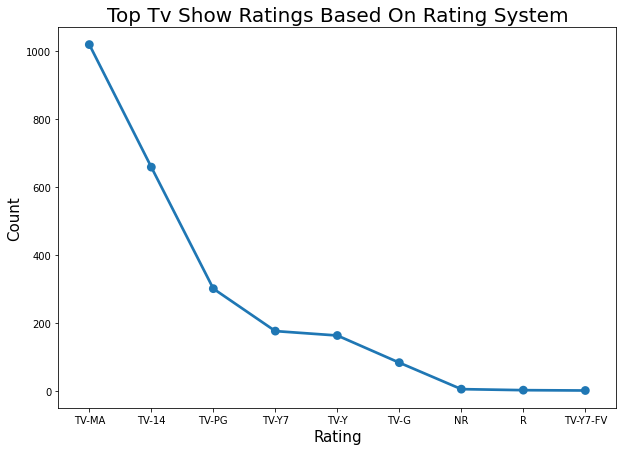

In [ ]:
# Plotting the ratings on tv shows on pointplot

tvshow_ratings = tv_netflix_df.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims)  
sns.pointplot(x = 'rating',y = 'count',data = tvshow_ratings)
plt.xlabel('Rating', size = '15')
plt.ylabel('Count', size = '15')
plt.title('Top Tv Show Ratings Based On Rating System', size = '20')
plt.show()

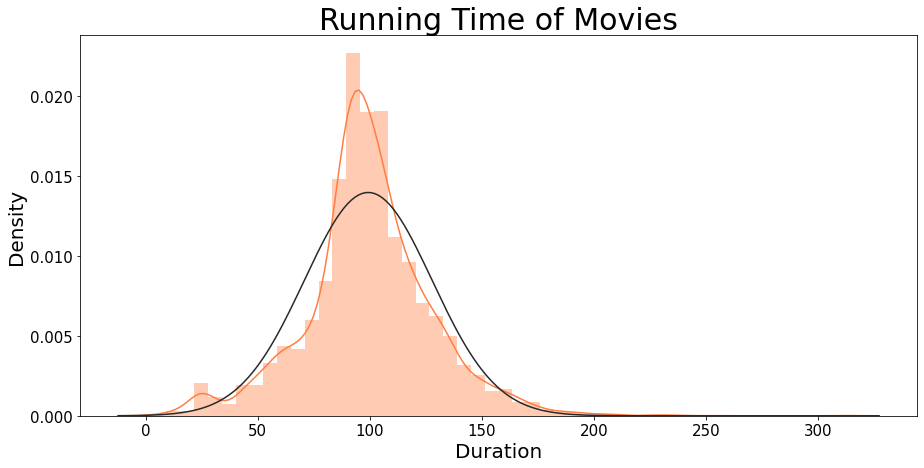

In [ ]:
movie_netflix_df = netflix_df[netflix_df['type'] == 'Movie']
movie_netflix_df['duration'].value_counts()

# Importing Norm Distrbution 
from scipy.stats import norm

movie_netflix_df['duration'] = movie_netflix_df['duration'].str.replace('min','')
movie_netflix_df['duration'] = movie_netflix_df['duration'].astype(str).astype(int)

fig, ax = plt.subplots(figsize = (15,7))
sns.distplot(movie_netflix_df['duration'], hist = True, color = '#FF7D40', ax = ax, fit = norm)
ax.tick_params(axis = 'x', labelsize = 15) 
ax.tick_params(axis = 'y', labelsize = 15)
ax.set_xlabel('Duration', fontsize = 20)
ax.set_ylabel('Density', fontsize = 20)
ax.set_title('Running Time of Movies', fontsize = 30);

In [ ]:
movie_duration = movie_netflix_df['duration'].value_counts().head(10).sort_index(ascending = False).T.reset_index()

fig = px.pie(movie_duration, values = 'duration', names = 'index', color_discrete_sequence = px.colors.sequential.Turbo)
fig.update_layout(title = 'Top 10 Duration for Movies')
fig.update_traces(textposition = 'inside', textinfo = 'percent+label', textfont_size = 20,
                  marker = dict( line = dict(color = '#000000', width = 2)))

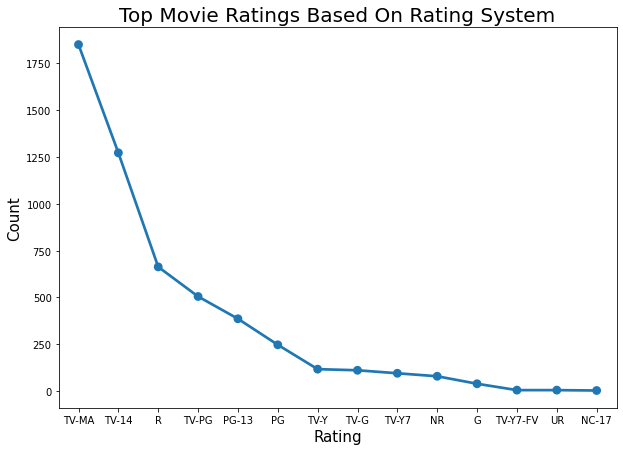

In [ ]:
# Plotting the ratings on movies on pointplot

movie_ratings = movie_netflix_df.groupby(['rating'])['show_id'].count().reset_index(name = 'count').sort_values(by = 'count',ascending = False)
fig_dims = (10,7)
fig, ax = plt.subplots(figsize = fig_dims)  
sns.pointplot(x = 'rating',y = 'count',data = movie_ratings)
plt.xlabel('Rating', size = '15')
plt.ylabel('Count', size = '15')
plt.title('Top Movie Ratings Based On Rating System', size = '20')
plt.show()

In [ ]:
movie_netflix_df['director'].value_counts().to_frame(name = 'Count').head()

,Count
"Raúl Campos, Jan Suter",18
Marcus Raboy,15
Jay Karas,14
Cathy Garcia-Molina,13
Youssef Chahine,12


In [ ]:
fig = px.bar(movie_netflix_df, 
             x = movie_netflix_df['listed_in'].value_counts().head(15).index, 
             y = movie_netflix_df['listed_in'].value_counts().head(15).values,
             color = movie_netflix_df['listed_in'].value_counts().head(15).values,
             labels = {'x':'Genre ', 'y': 'Count '}, 
             title = 'Top 15 Genre in Movie Shows',
             height = 500)
fig.show()

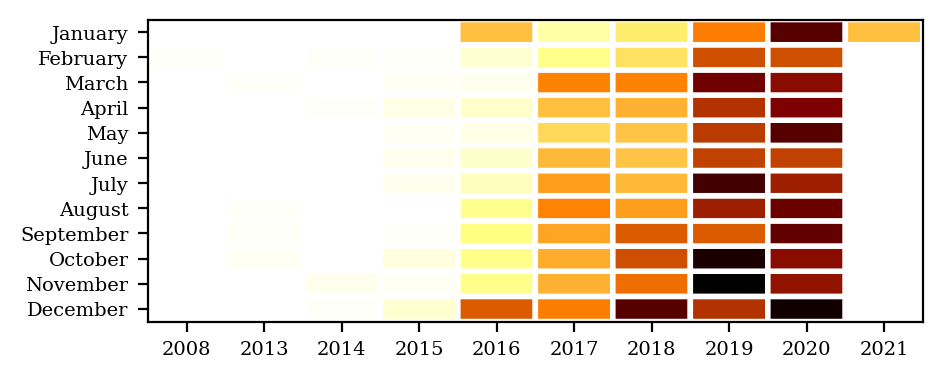

In [ ]:
netflix_date = tv_netflix_df[['date_added']].dropna()

netflix_date['year'] = netflix_date['date_added'].apply(lambda x : x.split(', ')[-1])
netflix_date['month'] = netflix_date['date_added'].apply(lambda x : x.lstrip().split(' ')[0])

month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'][::-1]
month_year_netflix_df = netflix_date.groupby('year')['month'].value_counts().unstack().fillna(0)[month_order].T
plt.figure(figsize=(5, 2), dpi=200)
plt.pcolor(month_year_netflix_df, cmap = 'afmhot_r', edgecolors = 'white', linewidths = 2) # heatmap
plt.xticks(np.arange(0.5, len(month_year_netflix_df.columns), 1), month_year_netflix_df.columns, fontsize=7, fontfamily='serif')
plt.yticks(np.arange(0.5, len(month_year_netflix_df.index), 1), month_year_netflix_df.index, fontsize=7, fontfamily='serif');

In [ ]:
# feature engineering
# getting date in the right format and year/month extraction
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'])
netflix_df['year_added'] = netflix_df['date_added'].dt.year
netflix_df['month_added'] = netflix_df['date_added'].dt.month

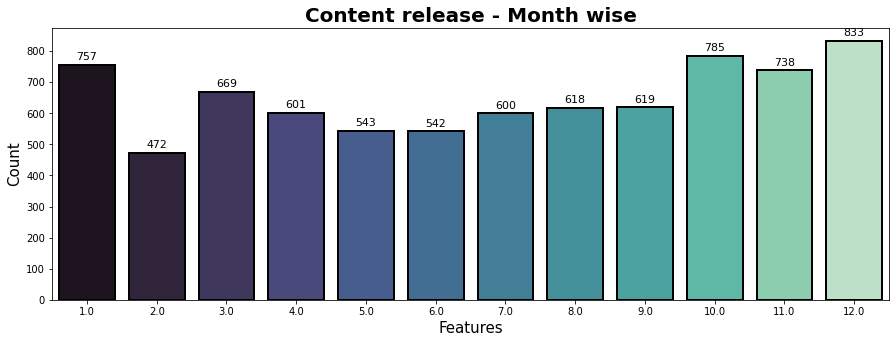

In [ ]:
f, ax = plt.subplots(figsize = (15, 5))
cplot = sns.countplot(x = netflix_df['month_added'], palette = 'mako', lw = 2, ec = 'black')
for count in cplot.patches:
    height = count.get_height()
    ax.annotate('{}'.format(height),xy = (count.get_x() + count.get_width()/2, height),
                    ha = 'center', va = 'bottom', size = 11, xytext = (0, 3), textcoords = 'offset points')
cplot.set_title('Content release - Month wise', fontsize = 20, weight = 'bold')
cplot.set_ylabel('Count', fontsize = 15)
cplot.set_xlabel('Features', fontsize = 15);

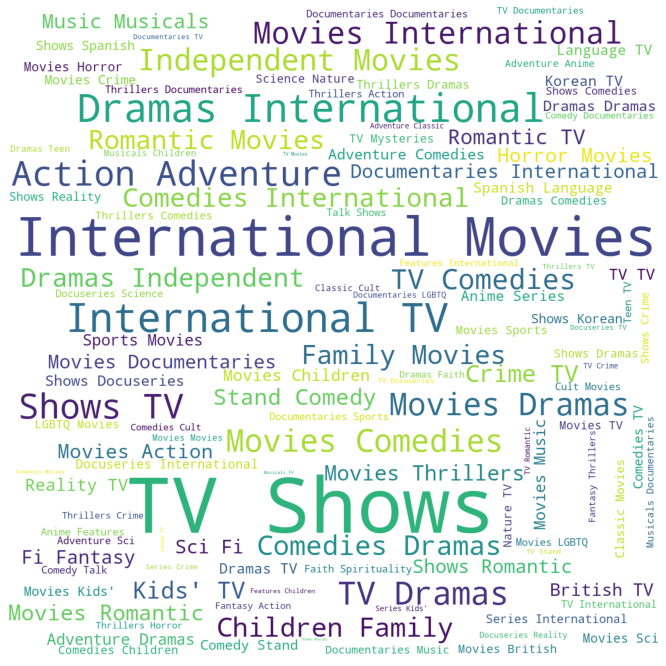

In [ ]:
#Wordcloud for the same
from wordcloud import WordCloud, STOPWORDS

text = ' '.join(netflix_df['listed_in'])

plt.rcParams['figure.figsize'] = (12,12)
wordcloud = WordCloud(background_color = 'white', width = 1200,  height = 1200, max_words = 121).generate(text)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# Preparing data for heatmap
netflix_df['count'] = 1
data = netflix_df.groupby('principal_country')[['principal_country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['principal_country']


netflix_df_heatmap = netflix_df.loc[netflix_df['principal_country'].isin(data)]
netflix_df_heatmap = pd.crosstab(netflix_df_heatmap['principal_country'], netflix_df_heatmap['age_rating'],normalize = "index").T
netflix_df_heatmap

principal_country,Australia,Canada,France,India,Japan,Mexico,South Korea,Spain,United Kingdom,United States
age_rating,,,,,,,,,,
Adults,0.490741,0.467181,0.627551,0.259414,0.367089,0.764228,0.463918,0.797619,0.526863,0.463422
Kids,0.129630,0.150579,0.086735,0.015690,0.008439,0.016260,0.046392,0.035714,0.077990,0.089086
Older Kids,0.222222,0.220077,0.112245,0.163180,0.274262,0.089431,0.123711,0.053571,0.183709,0.202065
Teens,0.027778,0.027027,0.030612,0.004184,0.012658,0.016260,0.000000,0.017857,0.071057,0.084366
Young Adults,0.129630,0.135135,0.142857,0.557531,0.337553,0.113821,0.365979,0.095238,0.140381,0.161062


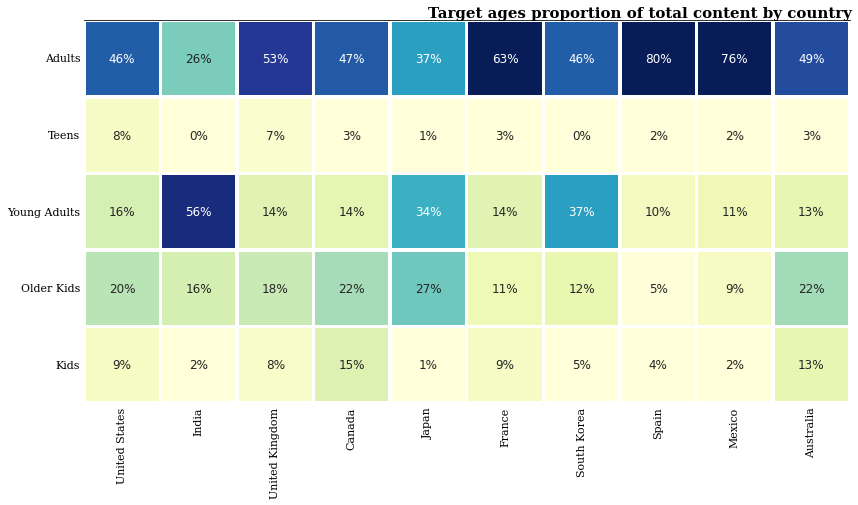

In [ ]:
# Plotting the heatmap
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico', 'Australia']

age_order = ['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']

sns.heatmap(netflix_df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})

ax.spines['top'].set_visible(True)


fig.text(.99, .725, 'Target ages proportion of total content by country', fontweight='bold', fontfamily='serif', fontsize=15,ha='right')   

ax.set_yticklabels(ax.get_yticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.set_ylabel('')    
ax.set_xlabel('')
ax.tick_params(axis=u'both', which=u'both',length=0)
plt.tight_layout()
plt.show()

In [ ]:
netflix = dataset.copy()

netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [ ]:
netflix['date'] = pd.to_datetime(netflix['date_added'])
netflix['Year'] = netflix['date'].dt.year
netflix['Month'] = netflix['date'].dt.month
netflix['Day'] = netflix['date'].dt.day
#netflix['Year'].astype(int)
#netflix['Day'].astype(int);

In [ ]:
netflix['listed_in'].value_counts()
netflix['listed_in'].value_counts().size
#Too much classes, we just obtain the first 50 (the most common 50)
content_type = netflix['listed_in'].value_counts().iloc[0:50]

#Unify some of the similiar types by the "strongest wins" criterium:
#We dont need to diferenciate between international series, or TV/Movies dramas, we have other columns to do so

netflix = netflix.replace({'listed_in': 'Dramas, Independent Movies, International Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix = netflix.replace({'listed_in': 'Dramas, International Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix = netflix.replace({'listed_in': 'Dramas, Independent Movies'}, {'listed_in': 'Dramas'},regex=True)
netflix = netflix.replace({'listed_in': 'TV Dramas'}, {'listed_in': 'Dramas'},regex=True)
netflix = netflix.replace({'listed_in': 'International TV Shows, TV Dramas'}, {'listed_in': 'Dramas'},regex=True)

#For documentaries
netflix = netflix.replace({'listed_in':'Documentaries, International Movies'}, {'listed_in': 'Documentaries'},regex=True) 

#For horror movies
netflix = netflix.replace({'listed_in':'Horror Movies, International Movies,'}, {'listed_in': 'Horror Movies'},regex=True)
netflix = netflix.replace({'listed_in':'Horror Movies, Thrillers'}, {'listed_in': 'Horror Movies'},regex=True)

#Thrillers
netflix = netflix.replace({'listed_in':'Dramas, Thrillers'}, {'listed_in': 'Thrillers'},regex=True)
netflix = netflix.replace({'listed_in':'International Movies, Thrillers'}, {'listed_in': 'Thrillers'},regex=True)

#Action
netflix = netflix.replace({'listed_in':'Action & Adventure, International Movies '}, {'listed_in': 'Action & Adventure'},regex=True)
netflix = netflix.replace({'listed_in':'Action & Adventure, Dramas'}, {'listed_in': 'Action & Adventure'},regex=True)

#Comedies in 3 groups: comedies, drama/comedies and romantic/comedies
netflix = netflix.replace({'listed_in':'Stand-Up Comedy'}, {'listed_in': 'Comedies'},regex=True)
netflix = netflix.replace({'listed_in':'Action & Adventure, Comedies, International Movies'}, {'listed_in': 'Comedies'},regex=True)
netflix = netflix.replace({'listed_in':'TV Comedies'}, {'listed_in': 'Comedies'},regex=True)
netflix = netflix.replace({'listed_in':'Comedies, International Movies'}, {'listed_in': 'Comedies'},regex=True)
netflix = netflix.replace({'listed_in':'Comedies, Dramas, Independent Movies'}, {'listed_in': 'Comedies, Dramas'},regex=True)
netflix = netflix.replace({'listed_in':'Comedies, International Movies, Romantic Movies'}, {'listed_in': 'Comedies, Romantic Movies'},regex=True)

#Kids TV all in one
netflix = netflix.replace({'listed_in': "Kids' TV, TV Comedies"}, {'listed_in': "Kids' TV"},regex=True)
netflix = netflix.replace({'listed_in': "Kids' TV, Comedies"}, {'listed_in': "Kids' TV"},regex=True)
netflix = netflix.replace({'listed_in': "Children & Family Movies, Comedies"}, {'listed_in': "Children & Family Movies"},regex=True)


#We have to delete the instances with listed_in: Movies. They dont give information and wont be useful in future
netflix = netflix[netflix['listed_in'] != 'Movies']

content_type = netflix['listed_in'].value_counts().iloc[0:50]

In [ ]:
#We delete some features, we prepare the df to feed the clustering algorithms.

netflix=netflix.dropna(axis=0)
netflix.drop(netflix.iloc[:,[0,2,4,6,8,9,11,12,14,15]],axis=1,inplace=True)

#Form a full numerical valued dataset:
# Type
netflix['type']=netflix['type'].astype('category')
d1 = dict(enumerate(netflix['type'].cat.categories)) #To save old values
netflix['type']=netflix['type'].cat.codes

#Director
netflix['director']=netflix['director'].astype('category')
d2 = dict(enumerate(netflix['director'].cat.categories)) #To save old values
netflix['director']=netflix['director'].cat.codes

#Country
netflix['country']=netflix['country'].astype('category')
d3 = dict(enumerate(netflix['country'].cat.categories)) #To save old values
netflix['country']=netflix['country'].cat.codes

# Listed_in
netflix['listed_in']=netflix['listed_in'].astype('category')
d4= dict(enumerate(netflix['listed_in'].cat.categories)) #To save old values
netflix['listed_in']=netflix['listed_in'].cat.codes

netflix.head()

,type,director,country,release_year,listed_in,Year
1,0,1629,239,2016,184,2016.0
2,0,1136,295,2011,213,2018.0
3,0,3059,439,2009,39,2017.0
4,0,2812,439,2008,184,2020.0
5,1,3035,356,2016,234,2017.0


In [ ]:
print('There are {} rows and {} columns'.format(netflix.shape[0], netflix.shape[1])+' in our Netflix Dataset.')

There are 4786 rows and 6 columns in our Netflix Dataset.


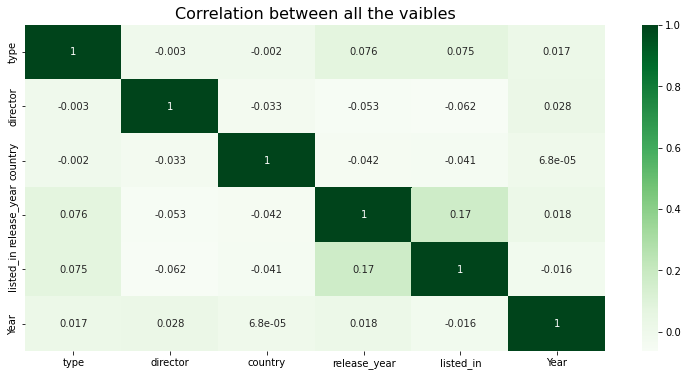

In [ ]:
#visualization of the correlation in the heatmap
plt.figure(figsize=(13, 6))
sns.heatmap(netflix.corr(), annot = True, cmap = 'Greens')
plt.title('Correlation between all the vaibles', size=16)
plt.show()

In [ ]:
import matplotlib.cm as cm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [ ]:
# transform the data using StandardScaler
netflix_standarized = pd.DataFrame(StandardScaler().fit_transform(netflix), columns = netflix.columns)

#Perform a PCA to visualize clusters
pca = PCA(n_components = 2)
netflix_pca=pd.DataFrame(pca.fit_transform(netflix_standarized))

# Affinity Propagation

In [ ]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics

af = AffinityPropagation(preference = -753, damping = 0.60, verbose = True, random_state = 0).fit(netflix_standarized) #Using euclidean distance as affinity estimator
#af = AffinityPropagation(damping=0.97,affinity='euclidean',verbose=True).fit(netflix) #Using euclidean distance
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_

n_clusters_ = len(cluster_centers_indices)

print('Estimated number of clusters: %d' % n_clusters_)
print('Silhouette Coefficient: %0.3f' % metrics.silhouette_score(netflix_standarized, labels, metric = 'sqeuclidean'))

Converged after 123 iterations.
Estimated number of clusters: 9
Silhouette Coefficient: 0.308


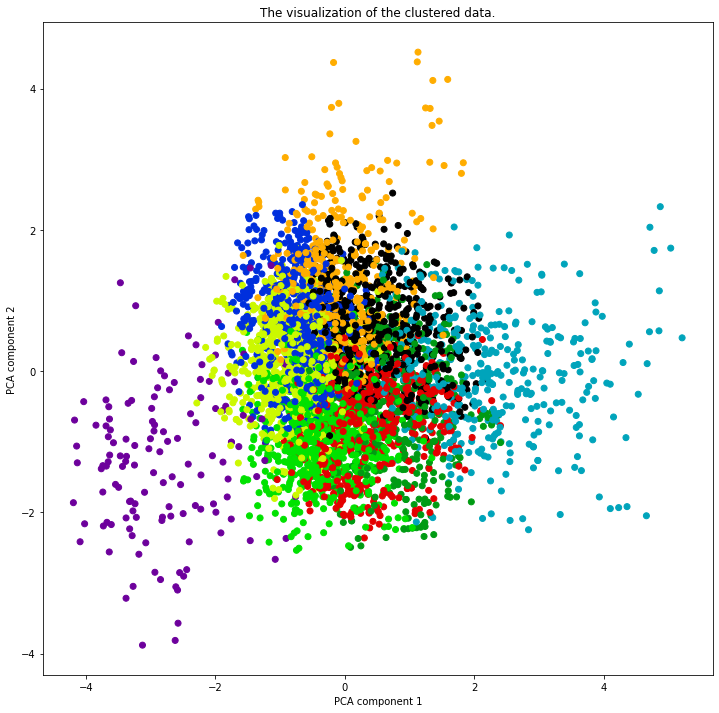

In [ ]:
colors = cm.nipy_spectral(labels.astype(float) / n_clusters_)
ax = plt.gca()
plt.scatter(netflix_pca[0], netflix_pca[1], c = colors)
ax.set_title('The visualization of the clustered data.')
ax.set_xlabel('PCA component 1')
ax.set_ylabel('PCA component 2');

# Agglomerative Clustering

In [ ]:
# lets start with programimg
def silhouette_analysis(X, X_pca, range_n_clusters):
    
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = AgglomerativeClustering(n_clusters = n_clusters,
                                   affinity = 'euclidean',
                                   linkage = 'ward')
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print('For n_clusters =', n_clusters,
              'The average silhouette_score is :', silhouette_avg)

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10
        ax1.set_title('The silhouette plot for the various clusters.')
        ax1.set_xlabel('The silhouette coefficient values')
        ax1.set_ylabel('Clusters')

        ax1.axvline(x=silhouette_avg, color = 'red', linestyle= '--')

        ax1.set_yticks([])  
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X_pca[0], X_pca[1], c=colors)
    
        ax2.set_title('The visualization of the clustered data.')
        ax2.set_xlabel('PCA component 1')
        ax2.set_ylabel('PCA component 2')

        plt.suptitle(('\nSilhouette analysis for Agglomerative clustering '
                      'with n_clusters = %d' % n_clusters),
                     fontsize=14, fontweight='bold')

    plt.show()

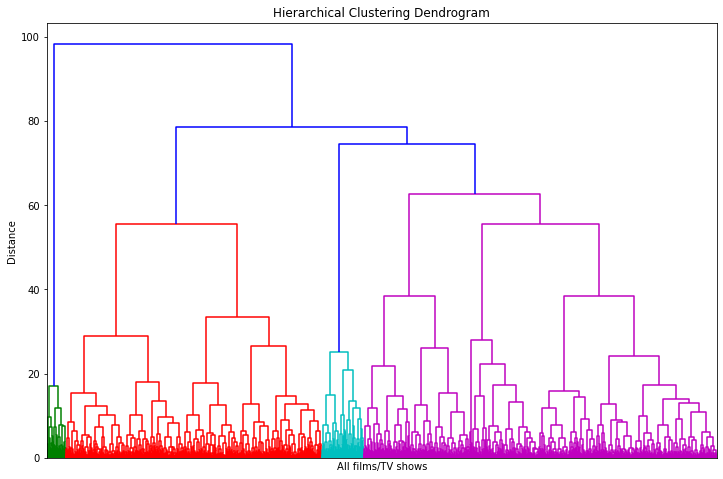

In [ ]:
# we use dendrogram to get number of clusters.
distances_linkage = linkage(netflix_standarized,
                            method = 'ward', 
                            metric = 'euclidean')                      
plt.figure(figsize=(12, 8))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('All films/TV shows')
plt.ylabel('Distance')
dendrogram(
    distances_linkage,
    no_labels = True
)

plt.show()

Assume we cut vertical lines with a horizontal line to obtain the number of clusters.
Number of clusters = 4

For n_clusters = 4 The average silhouette_score is : 0.17386835041534782


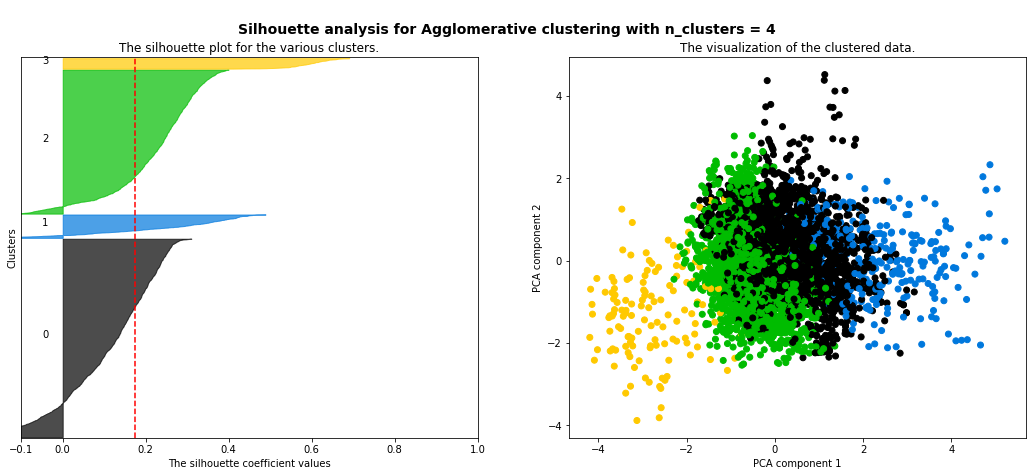

In [ ]:
silhouette_analysis(np.array(netflix_standarized),netflix_pca,[4]);

# K Means Clusteing

For n_clusters = 2 The average silhouette_score is : 0.7049787496083262
For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437
For n_clusters = 5 The average silhouette_score is : 0.56376469026194
For n_clusters = 6 The average silhouette_score is : 0.4504666294372765


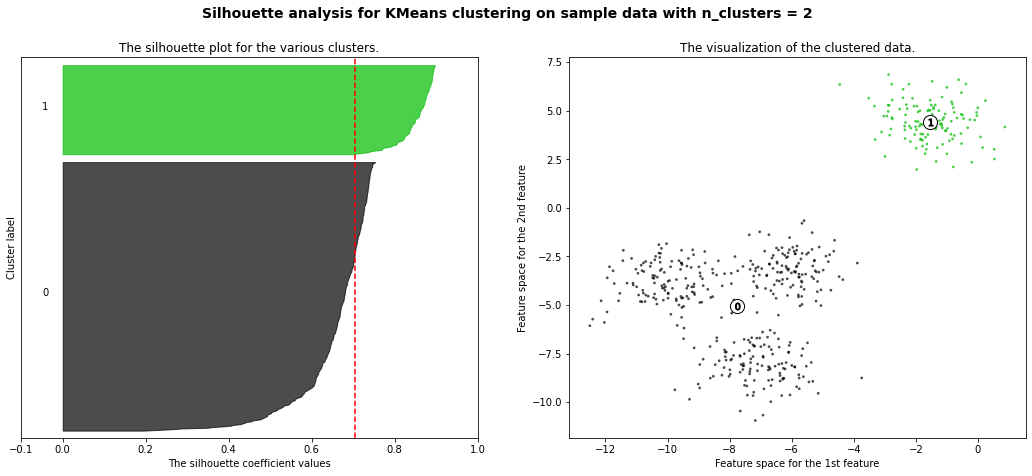

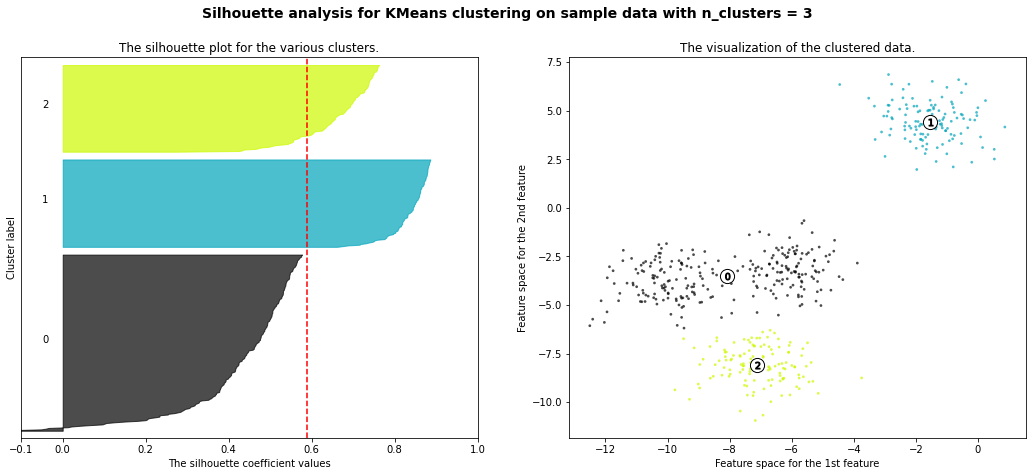

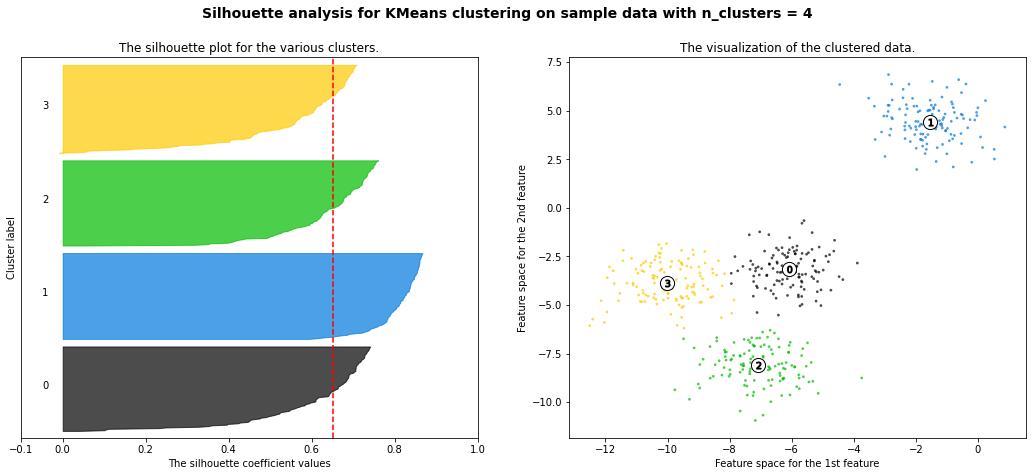

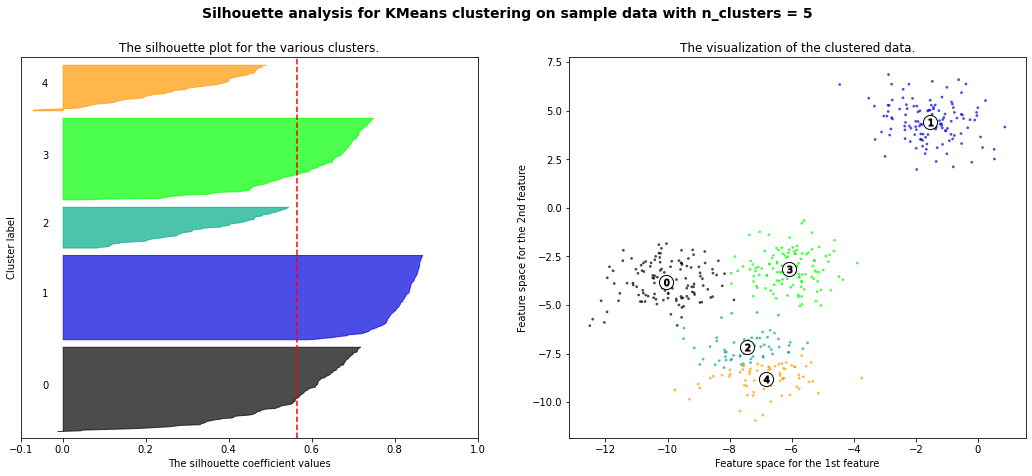

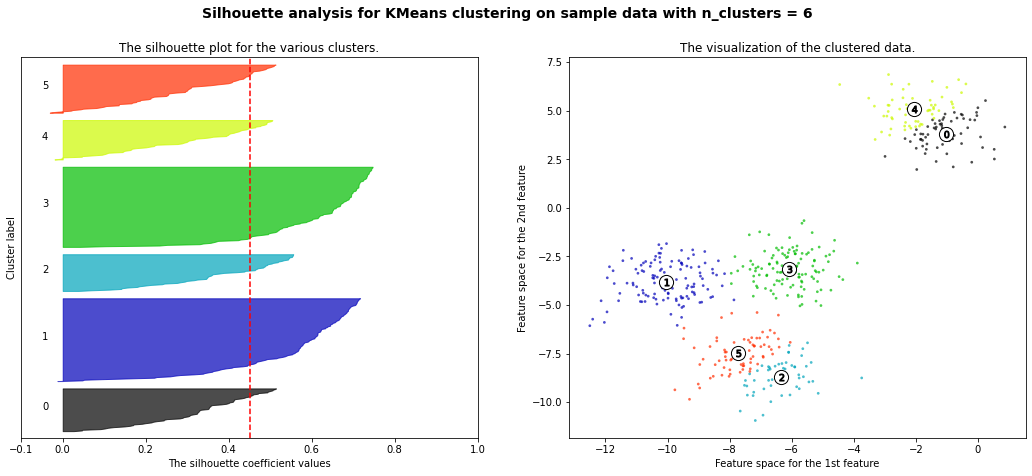

In [ ]:
# Generating the sample data from make_blobs

X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)              #  For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print('For n_clusters =', n_clusters,
          'The average silhouette_score is :', silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title('The silhouette plot for the various clusters.')
    ax1.set_xlabel('The silhouette coefficient values')
    ax1.set_ylabel('Cluster label')

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color='red', linestyle='--')

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title('The visualization of the clustered data.')
    ax2.set_xlabel('Feature space for the 1st feature')
    ax2.set_ylabel('Feature space for the 2nd feature')
    plt.suptitle(('Silhouette analysis for KMeans clustering on sample data '
                  'with n_clusters = %d' % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

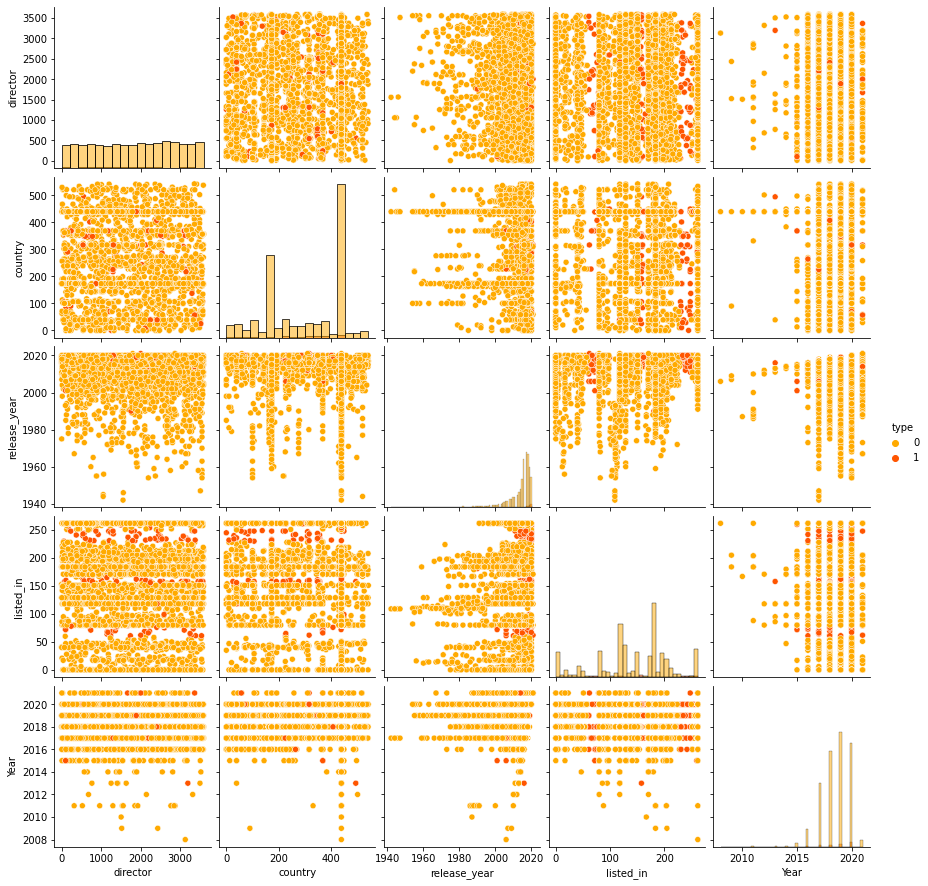

In [ ]:
# MODEL INTERPRETATION
# We try to gain new knowledge using the previous clustering
sns_plot = sns.pairplot(netflix, hue = 'type', diag_kind = 'hist', palette = 'autumn_r') #All features against each other
kmeans = KMeans(n_clusters = 4, random_state = 42)
kmeans.fit(netflix_standarized)
netflix['cluster'] = kmeans.labels_

Text(0.5, 1.0, 'NETFLIX ADDED')

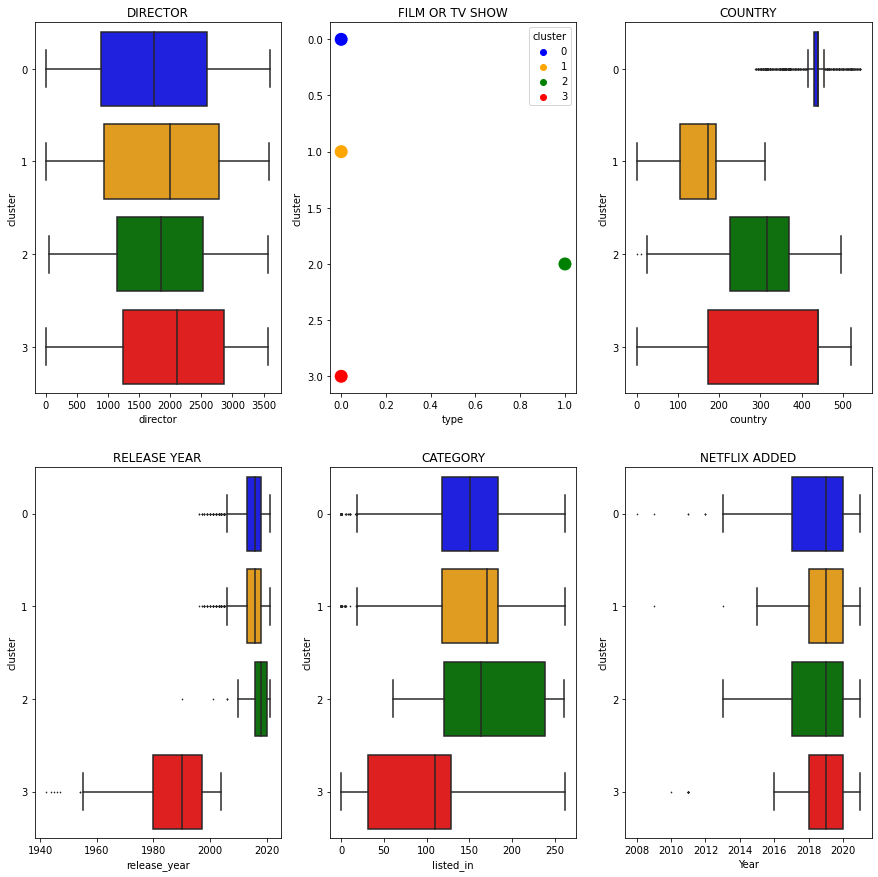

In [ ]:
#We also plot some boxplots for our clusters

fig, ((ax10,ax2,ax3),(ax4,ax5,ax6))= plt.subplots(2, 3)
fig.set_size_inches(15, 15)

plt.subplot(2, 3, 1)
ax1=sns.boxplot(x='director',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax1.set_title('DIRECTOR')

plt.subplot(2, 3, 2)
ax2=sns.scatterplot(x='type',
            y='cluster',
            hue='cluster',
            data=netflix,
            s=200,
            palette=['b','orange','g','r']
           )
ax2.invert_yaxis()
ax2.set_title('FILM OR TV SHOW')

plt.subplot(2, 3, 3)
ax3=sns.boxplot(x='country',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax3.set_title('COUNTRY')

plt.subplot(2, 3, 4)
ax4=sns.boxplot(x='release_year',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('RELEASE YEAR')

plt.subplot(2, 3, 5)
ax4=sns.boxplot(x='listed_in',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('CATEGORY')

plt.subplot(2, 3, 6)
ax4=sns.boxplot(x='Year',
            y='cluster',
            data=netflix,
            #hue='cluster',
            orient='h',
            palette=['b','orange','g','r'],
            fliersize=0.8,
            #showfliers = False
           )
ax4.set_title('NETFLIX ADDED')